### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer

warnings.filterwarnings('ignore')

### Importing the Dataset

In [ ]:
sales_data = pd.read_csv('Salesdata.csv')
stores_data = pd.read_csv('store.csv')

### Sample 100k data points from the Sales Data

In [ ]:
#Since we have 1000k data points, we will sample 100k data points using random sampling

num_samples = 100000

unique_val = sales_data['Store'].unique()

num_per_value = num_samples//len(unique_val)

sampled_sales_data = pd.concat([sales_data[sales_data['Store'] == value].sample(n=num_per_value, replace=False, random_state=40) for value in unique_val])


#If number of samples < 100k, we will further add data points
if len(sampled_sales_data) < num_samples:
    additional_samples = sales_data.sample(n=(num_samples - len(sampled_sales_data)))
    sampled_sales_data = pd.concat([sampled_sales_data, additional_samples])

In [ ]:
sampled_sales_data.shape

(100000, 9)

In [ ]:
sampled_sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
94775,1,4,07-05-2015,4529,491,1,1,0,0
990450,1,4,24-01-2013,5195,645,1,1,0,0
803130,1,4,11-07-2013,4053,486,1,0,0,1
828775,1,2,18-06-2013,4633,554,1,1,0,0
732885,1,4,12-09-2013,5079,586,1,1,0,0


In [ ]:
sampled_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 94775 to 403390
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          100000 non-null  int64 
 1   DayOfWeek      100000 non-null  int64 
 2   Date           100000 non-null  object
 3   Sales          100000 non-null  int64 
 4   Customers      100000 non-null  int64 
 5   Open           100000 non-null  int64 
 6   Promo          100000 non-null  int64 
 7   StateHoliday   100000 non-null  object
 8   SchoolHoliday  100000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [ ]:
stores_data.shape

(1115, 10)

In [ ]:
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Check for Duplicates

In [ ]:
sampled_sales_data.duplicated().sum()

77

In [ ]:
sampled_sales_data.drop_duplicates(inplace=True)

In [ ]:
sampled_sales_data.duplicated().sum()

0

In [ ]:
stores_data.duplicated().sum()

0

### Checking Distribution of Data

In [ ]:
sampled_sales_data['DayOfWeek'].value_counts()

DayOfWeek
4    18156
3    15905
1    15704
7    14950
6    13289
2    12161
5     9758
Name: count, dtype: int64

In [ ]:
sampled_sales_data['Open'].value_counts()

Open
1    82902
0    17021
Name: count, dtype: int64

In [ ]:
sampled_sales_data['Promo'].value_counts()

Promo
0    55069
1    44854
Name: count, dtype: int64

In [ ]:
sampled_sales_data['StateHoliday'].value_counts()

StateHoliday
0    85232
0    12356
a     1215
c      938
b      182
Name: count, dtype: int64

In [ ]:
sampled_sales_data['StateHoliday'].unique()

array(['0', 0, 'a', 'c', 'b'], dtype=object)

In [ ]:
sampled_sales_data['StateHoliday'] = sampled_sales_data['StateHoliday'].apply(lambda x: 0 if x == '0' else x)

In [ ]:
sampled_sales_data['StateHoliday'].value_counts()

StateHoliday
0    97588
a     1215
c      938
b      182
Name: count, dtype: int64

In [ ]:
sampled_sales_data['SchoolHoliday'].value_counts()

SchoolHoliday
0    82785
1    17138
Name: count, dtype: int64

In [ ]:
stores_data['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

In [ ]:
stores_data['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

In [ ]:
stores_data['Promo2'].value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

In [ ]:
stores_data['CompetitionOpenSinceMonth'].value_counts()

CompetitionOpenSinceMonth
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: count, dtype: int64

In [ ]:
stores_data['CompetitionOpenSinceYear'].value_counts()

CompetitionOpenSinceYear
2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: count, dtype: int64

In [ ]:
stores_data['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64

### Combine Two Datasets

In [ ]:
combined_data = pd.merge(sampled_sales_data, stores_data, on='Store', how='inner')

In [ ]:
combined_data.head(50)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,07-05-2015,4529,491,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,24-01-2013,5195,645,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,4,11-07-2013,4053,486,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,18-06-2013,4633,554,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,4,12-09-2013,5079,586,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,4,21-05-2015,3755,471,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,1,23-12-2013,9528,1130,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,6,17-08-2013,4078,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,2,05-08-2014,5433,620,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,7,16-03-2014,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Check for Missing values

In [ ]:
np.round(combined_data.isna().mean(), 4)

Store                        0.0000
DayOfWeek                    0.0000
Date                         0.0000
Sales                        0.0000
Customers                    0.0000
Open                         0.0000
Promo                        0.0000
StateHoliday                 0.0000
SchoolHoliday                0.0000
StoreType                    0.0000
Assortment                   0.0000
CompetitionDistance          0.0027
CompetitionOpenSinceMonth    0.3175
CompetitionOpenSinceYear     0.3175
Promo2                       0.0000
Promo2SinceWeek              0.4879
Promo2SinceYear              0.4879
PromoInterval                0.4879
dtype: float64

#### Extracting Date, Month, Year and Quarter from Date object

In [ ]:
features_to_remove = []

combined_data['date'] = combined_data['Date'].astype(str).str.split('-').str[0].astype(int)
combined_data['month'] = combined_data['Date'].astype(str).str.split('-').str[1].astype(int)
combined_data['year'] = combined_data['Date'].astype(str).str.split('-').str[2].astype(int)
combined_data['Date_new'] = pd.to_datetime(combined_data['Date'], format='%d-%m-%Y')
combined_data['Quarter'] = combined_data['Date_new'].dt.quarter
features_to_remove.append('Date')
features_to_remove.append('Date_new')

### Exploratory Data Analysis

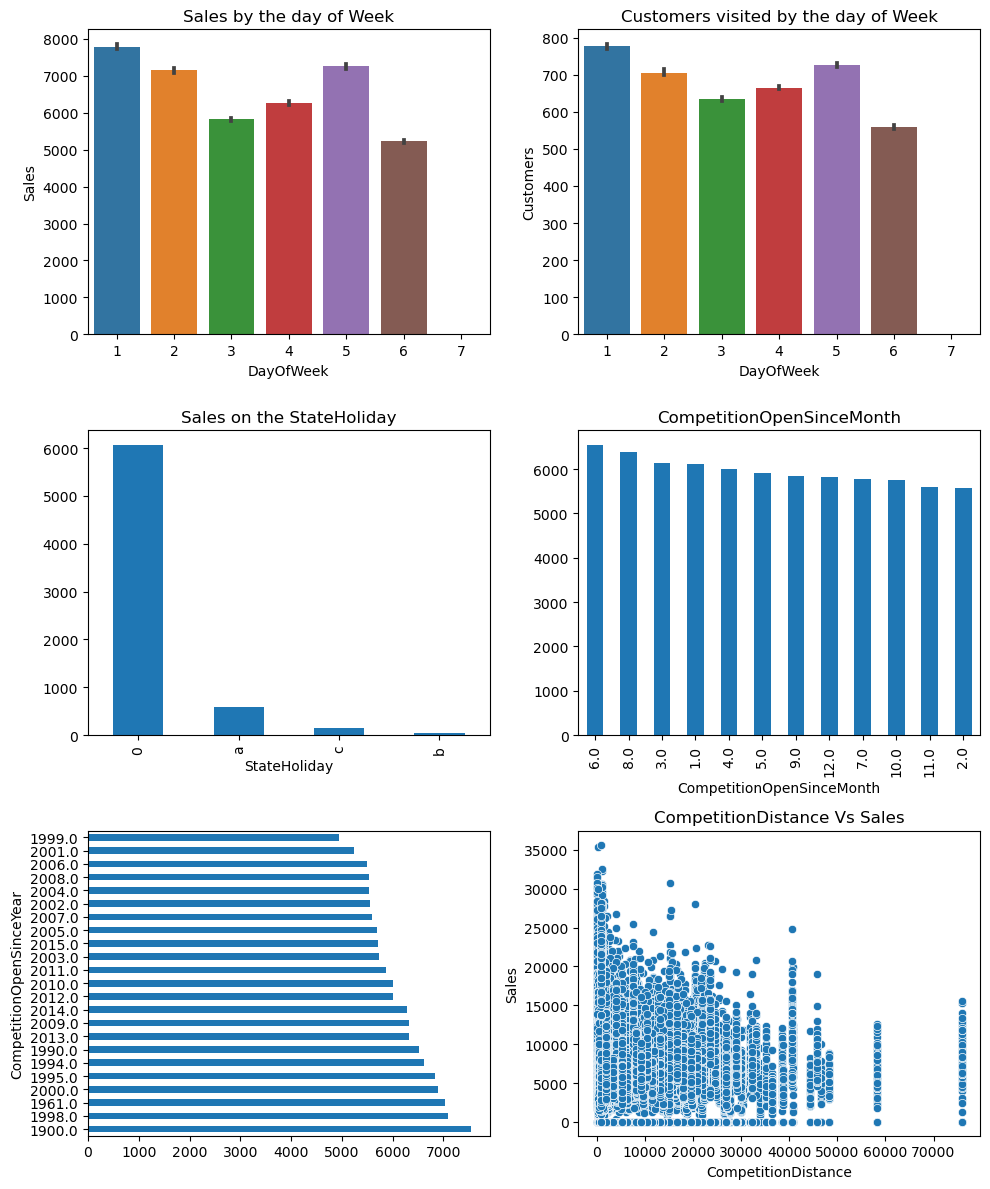

In [ ]:
plt.figure(figsize=(10, 12))

plt.subplot(3,2,1)
sns.barplot(combined_data, x="DayOfWeek", y="Sales", estimator='median')
plt.title('Sales by the day of Week')

plt.subplot(3,2,2)
sns.barplot(combined_data, x="DayOfWeek", y="Customers", estimator='median')
plt.title('Customers visited by the day of Week')

plt.subplot(3,2,3)
combined_data.groupby(['StateHoliday'])['Sales'].mean().sort_values(ascending=False).plot.bar()
plt.title('Sales on the StateHoliday')

plt.subplot(3,2,4)
combined_data.groupby(['CompetitionOpenSinceMonth'])['Sales'].median().sort_values(ascending=False).plot.bar()
plt.title('CompetitionOpenSinceMonth')

plt.subplot(3,2,5)
combined_data.groupby(['CompetitionOpenSinceYear'])['Sales'].median().sort_values(ascending=False).plot.barh()

plt.subplot(3,2,6)
sns.scatterplot(data=combined_data, x='CompetitionDistance', y='Sales')
plt.title('CompetitionDistance Vs Sales')

plt.tight_layout()
plt.show()

#### **Observations:**
- It is clearly observable that the maximum median sales has done on the 1st day of the week (i.e. Monday), followed by Friday.
- Least sales has done on the Sunday.
- It is clearly observable that the maximum customers visited the stores on the 1st day of the week (i.e. Monday), followed by Friday.
- Least customers visited the stores on the Sunday.

#### Status of the Store

In [ ]:
combined_data.groupby(['Open'])['Sales'].median().sort_values(ascending=False)

Open
1    6567.0
0       0.0
Name: Sales, dtype: float64

- Since the sales has been done when the shops were open.
- Hence this is not useful feature to forecast the sales.

In [ ]:
features_to_remove.append('Open')

In [ ]:
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,date,month,year,Date_new,Quarter
0,1,4,07-05-2015,4529,491,1,1,0,0,c,...,2008.0,0,NaN,NaN,NaN,7,5,2015,2015-05-07,2
1,1,4,24-01-2013,5195,645,1,1,0,0,c,...,2008.0,0,NaN,NaN,NaN,24,1,2013,2013-01-24,1
2,1,4,11-07-2013,4053,486,1,0,0,1,c,...,2008.0,0,NaN,NaN,NaN,11,7,2013,2013-07-11,3
3,1,2,18-06-2013,4633,554,1,1,0,0,c,...,2008.0,0,NaN,NaN,NaN,18,6,2013,2013-06-18,2
4,1,4,12-09-2013,5079,586,1,1,0,0,c,...,2008.0,0,NaN,NaN,NaN,12,9,2013,2013-09-12,3


In [ ]:
def plot_sales(df, index_lst, column_lst, values_lst, titles_lst):
    l = 1
    plt.figure(figsize=(11, 12))

    for index,column,values,title in zip(index_lst, column_lst, values_lst, titles_lst):
        pivot_df = df.pivot_table(index=index, columns=column, values=values)
        plt.subplot(3,2,l)
        for column in pivot_df.columns:
            plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

        plt.xlabel(index)
        plt.ylabel(values)
        plt.title(title)

        plt.xticks(pivot_df.index)
        plt.legend()

        plt.grid(True)
        l += 1
    plt.tight_layout()
    plt.show()



In [ ]:
index_lst = ['month', 'month', 'month', 'month', 'Quarter']
column_lst = ['year', 'Promo', 'Promo2', 'SchoolHoliday', 'year']
values_lst = ['Sales', 'Sales', 'Sales', 'Sales', 'Sales']
titles_lst = ['Month-wise Year-wise Sales', 'Month-wise Sales when Promo Applied vs Promo Not Applied', 'Month-wise Sales when Promo2 Applied vs Promo2 Not Applied', \
              'Month-wise Sales for SchoolHoliday vs School Non-Holiday',  'Year-wise Quarterly Sales']

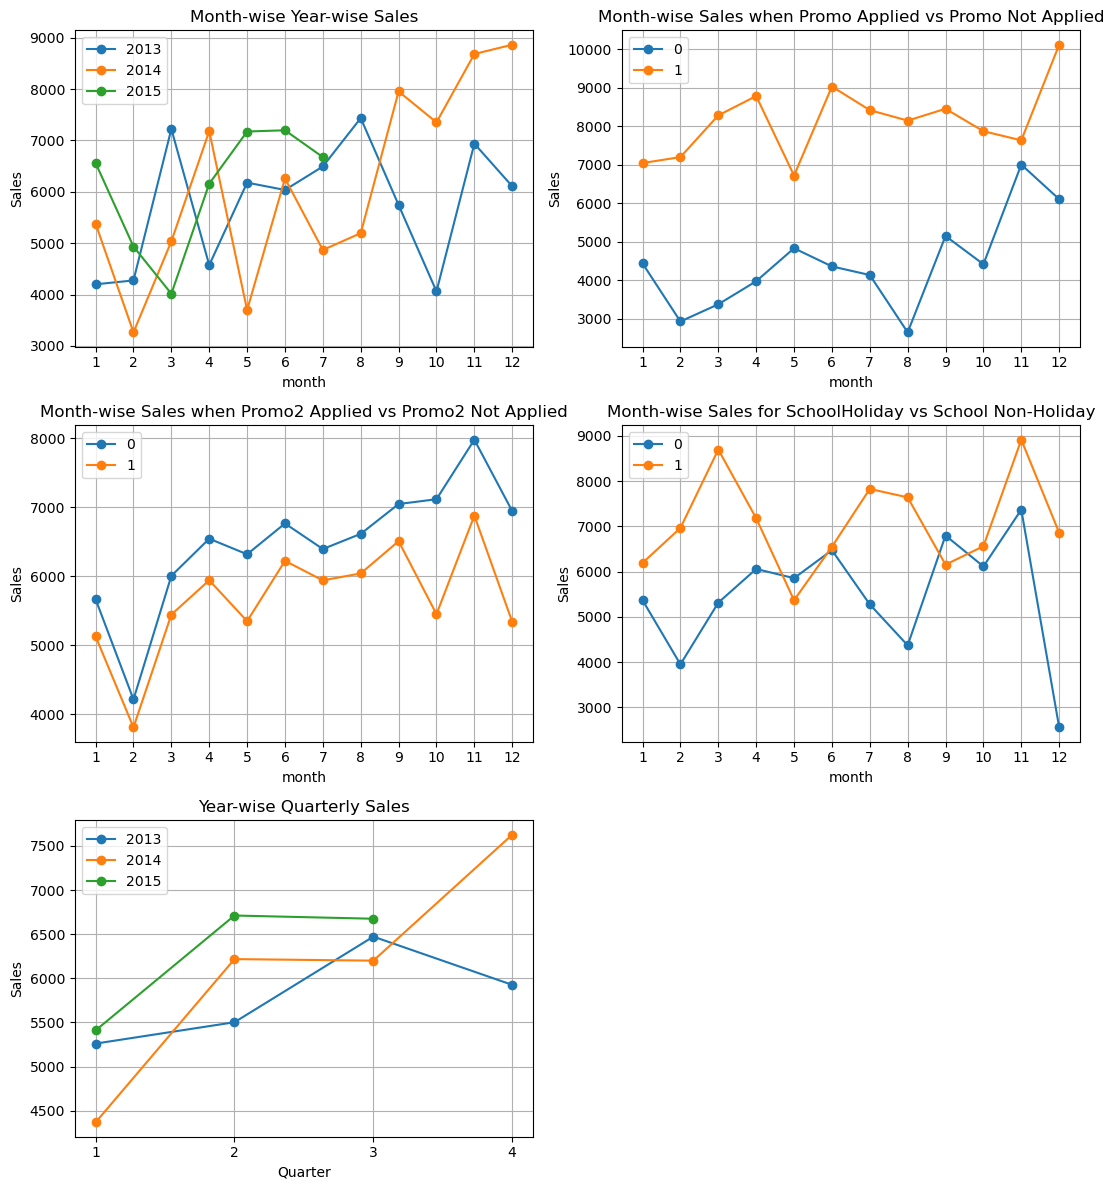

In [ ]:
plot_sales(combined_data, index_lst, column_lst, values_lst, titles_lst)

#### **Observations:**
- Sales were Maximum when Store was running a Promo on the day.
- It is observed that when Store were not continuining and promoting, sales were little bit higher than the sales when Store were continuining and promoting any promo.
- In year 2014, quarterly sales were either increasing/constant throughout the year.
- Sales were high on School Holidays.

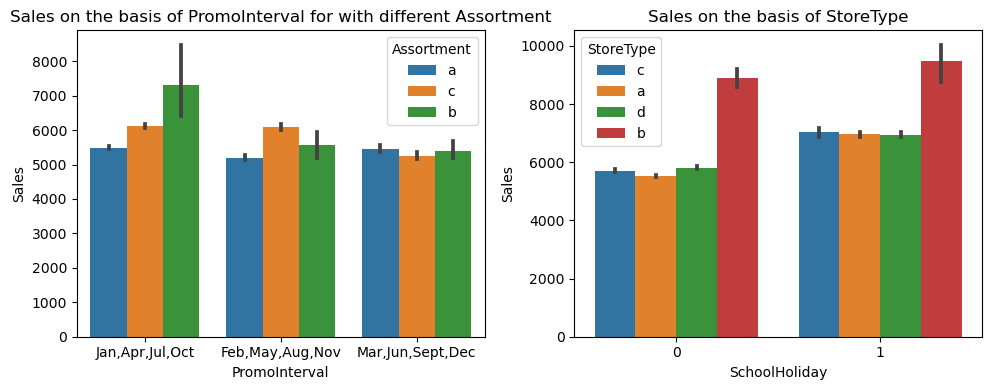

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.barplot(combined_data, x="PromoInterval", y="Sales", hue='Assortment', estimator='median')
plt.title('Sales on the basis of PromoInterval for with different Assortment')

plt.subplot(1,2,2)
sns.barplot(combined_data, x='SchoolHoliday', y="Sales", hue="StoreType", estimator='median')
plt.title('Sales on the basis of StoreType')

plt.tight_layout()
plt.show()

#### **Observations:**
- Median sales done on School holiday is very higher than the median sales done on the School Non-Holidays.

In [ ]:
combined_data_1 = combined_data.select_dtypes(include=np.number)

In [ ]:
combined_data_1.drop(['Store'], axis=1, inplace=True)

In [ ]:
combined_data_1.corr()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,date,month,year,Quarter
DayOfWeek,1.000000,-0.513159,-0.429255,-0.570525,-0.447577,-0.220087,-0.000218,-0.000186,-0.000329,0.001936,0.002001,-0.000096,-0.126798,-0.161299,0.059084,-0.148588
Sales,-0.513159,1.000000,0.894782,0.677710,0.478799,0.159804,-0.016722,-0.027450,0.011199,-0.091717,0.050623,-0.025252,0.145042,0.138896,0.039172,0.136306
Customers,-0.429255,0.894782,1.000000,0.619439,0.344070,0.140479,-0.100063,-0.031183,0.009251,-0.155842,0.030177,0.026483,0.108234,0.124217,-0.000292,0.123157
Open,-0.570525,0.677710,0.619439,1.000000,0.353435,0.111321,0.008665,0.001754,0.005350,-0.022304,-0.015086,-0.001437,0.111815,0.090843,0.000921,0.101673
Promo,-0.447577,0.478799,0.344070,0.353435,1.000000,0.118017,-0.000208,-0.000438,0.000164,-0.000150,-0.000126,-0.000295,0.075697,0.065867,0.103822,0.073826
SchoolHoliday,-0.220087,0.159804,0.140479,0.111321,0.118017,1.000000,-0.006655,-0.003454,0.008357,-0.036814,-0.026399,-0.009407,0.076067,0.296711,-0.063480,0.318742
CompetitionDistance,-0.000218,-0.016722,-0.100063,0.008665,-0.000208,-0.006655,1.000000,-0.059042,0.024801,-0.145742,-0.060903,-0.109004,0.000729,0.003650,0.000127,0.004086
CompetitionOpenSinceMonth,-0.000186,-0.027450,-0.031183,0.001754,-0.000438,-0.003454,-0.059042,1.000000,-0.052672,-0.011204,-0.035371,0.048125,-0.000567,-0.000877,0.000511,-0.000997
CompetitionOpenSinceYear,-0.000329,0.011199,0.009251,0.005350,0.000164,0.008357,0.024801,-0.052672,1.000000,-0.076381,-0.079966,0.006646,0.000360,0.004259,-0.000235,0.004669
Promo2,0.001936,-0.091717,-0.155842,-0.022304,-0.000150,-0.036814,-0.145742,-0.011204,-0.076381,1.000000,NaN,NaN,-0.003659,-0.029102,0.001442,-0.032186


### Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = combined_data.drop(['Sales'], axis=1)
y = combined_data['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((69946, 22), (69946,))

In [ ]:
X_test.shape, y_test.shape

((29977, 22), (29977,))

### Imputation of Missing/Null/Nan values

#### A. Imputation of Missing value in Train data

In [ ]:
X_train.isna().mean()

Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002774
CompetitionOpenSinceMonth    0.317874
CompetitionOpenSinceYear     0.317874
Promo2                       0.000000
Promo2SinceWeek              0.486504
Promo2SinceYear              0.486504
PromoInterval                0.486504
date                         0.000000
month                        0.000000
year                         0.000000
Date_new                     0.000000
Quarter                      0.000000
dtype: float64

#### 1. CompetitionDistance

In [ ]:
X_train_missing_values = {}

In [ ]:
X_train['CompetitionDistance'].describe()

count    69752.000000
mean      5391.522680
std       7679.409841
min         20.000000
25%        710.000000
50%       2320.000000
75%       6870.000000
max      75860.000000
Name: CompetitionDistance, dtype: float64

#### **Observations:**
- Here 75th percentile value = 6880 and Maximum = 75860
- It is a possibility that an outlier is present in this feature
- Hence we will impute Null/Nan values with median to overcome any outlier.

In [ ]:
X_train['CompetitionDistance'] = X_train['CompetitionDistance'].fillna(X_train['CompetitionDistance'].median())
X_train_missing_values['CompetitionDistance'] = X_train['CompetitionDistance'].median()

#### 2. PromoInterval

- We have 3 Promos
  1) Mar,Jun,Sept,Dec
  2) Jan,Apr,Jul,Oct
  3) Feb,May,Aug,Nov
- Missing values in this feature are very high ~ > 45% of total data. Hence we can not impute missing values with the Mode (Most frequent category) of the feature. As it will change the distribution of the data.
- Here we will consider Nan values as another category - "No Promo"

In [ ]:
X_train['PromoInterval'].fillna('No Promo', inplace=True)
X_train_missing_values['PromoInterval'] = 'No Promo'

#### 3. CompetitionOpenSinceMonth

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='count'>

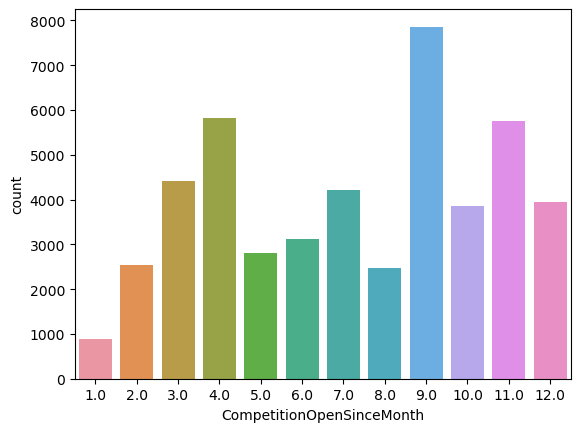

In [ ]:
sns.countplot(x='CompetitionOpenSinceMonth', data=X_train)

In [ ]:
X_train['CompetitionOpenSinceMonth_1'] = X_train['CompetitionOpenSinceMonth'].fillna(X_train['CompetitionOpenSinceMonth'].mode()[0])

<Axes: xlabel='CompetitionOpenSinceMonth_1', ylabel='count'>

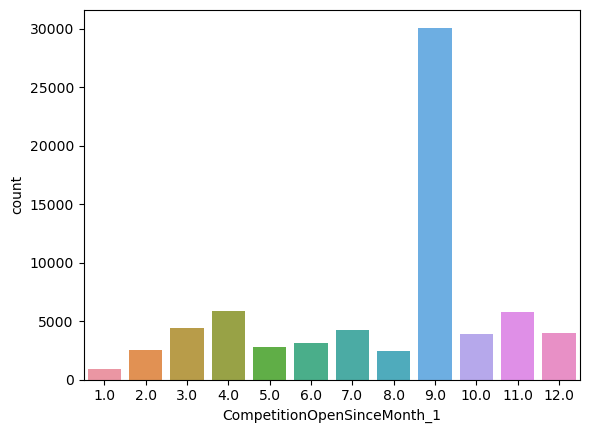

In [ ]:
sns.countplot(x='CompetitionOpenSinceMonth_1', data=X_train)

- Missing values in this feature are very high ~ > 30 of total data.
- It is changing the distribution of the data if we impute missing values with the Mode (Most frequent category).
- Hence we can not impute missing values with the Mode.


In [ ]:
X_train.drop(['CompetitionOpenSinceMonth_1'], axis=1, inplace=True)

- Here we will try with KNN (K-Nearest Neighbors) imputation method.
- It is used to fill in missing values in a dataset. It works by finding the K nearest neighbors of each observation with missing values and then using the values from those neighbors to impute the missing data.

##### KNN Imputation

In [ ]:
imputer = KNNImputer(n_neighbors= 3)
impute_with_3 = imputer.fit_transform(X_train[['CompetitionOpenSinceMonth']])

In [ ]:
X_train['CompetitionOpenSinceMonth_knn_impute'] = np.floor(impute_with_3)

<Axes: xlabel='CompetitionOpenSinceMonth_knn_impute', ylabel='count'>

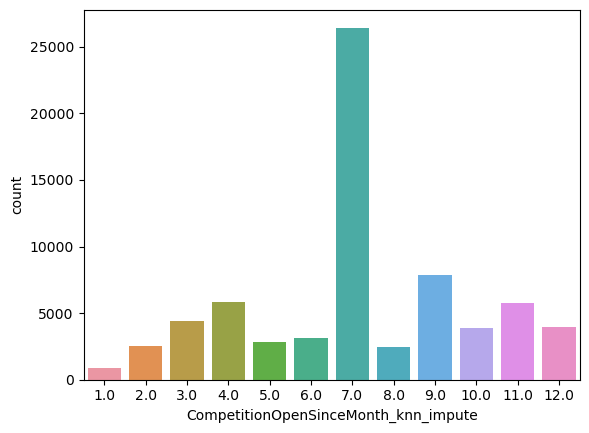

In [ ]:
sns.countplot(x='CompetitionOpenSinceMonth_knn_impute', data=X_train)

In [ ]:
X_train.drop(['CompetitionOpenSinceMonth_knn_impute'], axis=1, inplace=True)

- If we use KNN imputation, again it is totally changing the distribution of the data.
- So we will try with Random Sample Imputation.

In [ ]:
random_sample = X_train['CompetitionOpenSinceMonth'].dropna().sample(X_train['CompetitionOpenSinceMonth'].isna().sum(), random_state=0)
random_sample.index = X_train[X_train['CompetitionOpenSinceMonth'].isna()].index

In [ ]:
X_train['CompetitionOpenSinceMonth_random'] = X_train['CompetitionOpenSinceMonth'].fillna(random_sample)

<Axes: xlabel='CompetitionOpenSinceMonth_random', ylabel='count'>

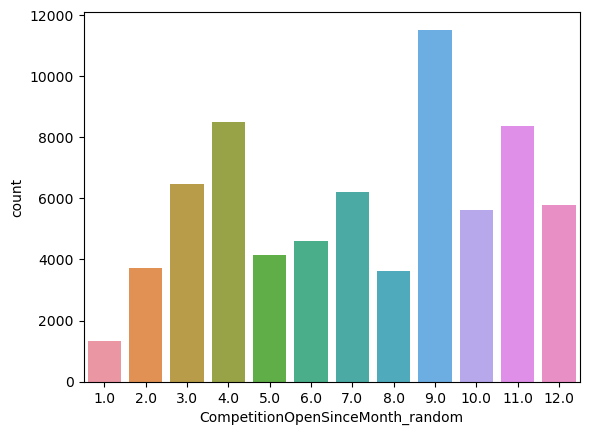

In [ ]:
sns.countplot(x='CompetitionOpenSinceMonth_random', data=X_train)

- With random sample imputation, we are imputing missing values with the randomly selected samples.
- With this approach, original distribution of the data is also preserved.

In [ ]:
X_train.drop(['CompetitionOpenSinceMonth_random'], axis=1, inplace=True)

##### Random Sample Imputation

In [ ]:
def impute_nan_with_random(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(), random_state=0)
    random_sample.index = df[df[variable].isna()].index
    df[variable] = df[variable].fillna(random_sample)

In [ ]:
for feature in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    impute_nan_with_random(X_train, feature)

#### 4. Promo2SinceWeek/Year

- For these features, missing values are present only when Promo2 = 0
- Hence we will impute missing values in these two features with 0 as there is no Promo code.

In [ ]:
X_train['Promo2SinceWeek'].fillna(0, inplace=True)
X_train['Promo2SinceYear'].fillna(0, inplace=True)
X_train_missing_values['Promo2SinceYear'] = 0
X_train_missing_values['Promo2SinceWeek'] = 0

In [ ]:
X_train.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
date                         0
month                        0
year                         0
Date_new                     0
Quarter                      0
dtype: int64

#### B. Imputation of Missing value in Test dataset

In [ ]:
X_test.isna().sum()

Store                            0
DayOfWeek                        0
Date                             0
Customers                        0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             74
CompetitionOpenSinceMonth     9489
CompetitionOpenSinceYear      9489
Promo2                           0
Promo2SinceWeek              14719
Promo2SinceYear              14719
PromoInterval                14719
date                             0
month                            0
year                             0
Date_new                         0
Quarter                          0
dtype: int64

In [ ]:
X_test['CompetitionDistance'].fillna(X_train_missing_values['CompetitionDistance'], inplace=True)
X_test['Promo2SinceYear'].fillna(X_train_missing_values['Promo2SinceYear'], inplace=True)
X_test['Promo2SinceWeek'].fillna(X_train_missing_values['Promo2SinceWeek'], inplace=True)
X_test['PromoInterval'].fillna(X_train_missing_values['PromoInterval'], inplace=True)
for feature in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    impute_nan_with_random(X_test, feature)

In [ ]:
X_test.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
date                         0
month                        0
year                         0
Date_new                     0
Quarter                      0
dtype: int64

In [ ]:
X_test.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,date,month,year,Date_new,Quarter
12750,143,7,20-01-2013,0,0,0,0,0,d,a,...,2002.0,0,0.0,0.0,No Promo,20,1,2013,2013-01-20,1
35743,399,1,29-04-2013,657,1,1,0,0,a,a,...,2012.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",29,4,2013,2013-04-29,2
98359,1098,5,19-06-2015,775,1,1,0,0,a,a,...,2004.0,0,0.0,0.0,No Promo,19,6,2015,2015-06-19,2
82229,918,7,28-04-2013,0,0,0,0,0,a,c,...,2015.0,0,0.0,0.0,No Promo,28,4,2013,2013-04-28,2
64004,715,4,28-05-2015,699,1,0,0,0,a,a,...,2014.0,0,0.0,0.0,No Promo,28,5,2015,2015-05-28,2


### Remove unwanted features/columns

In [ ]:
X_train.drop(features_to_remove, axis=1, inplace=True)
X_test.drop(features_to_remove, axis=1, inplace=True)

### Encoding Categorical Features

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69946 entries, 53207 to 15795
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      69946 non-null  int64  
 1   DayOfWeek                  69946 non-null  int64  
 2   Customers                  69946 non-null  int64  
 3   Promo                      69946 non-null  int64  
 4   StateHoliday               69946 non-null  object 
 5   SchoolHoliday              69946 non-null  int64  
 6   StoreType                  69946 non-null  object 
 7   Assortment                 69946 non-null  object 
 8   CompetitionDistance        69946 non-null  float64
 9   CompetitionOpenSinceMonth  69946 non-null  float64
 10  CompetitionOpenSinceYear   69946 non-null  float64
 11  Promo2                     69946 non-null  int64  
 12  Promo2SinceWeek            69946 non-null  float64
 13  Promo2SinceYear            69946 non-null  floa

#### **Observations:**
- Here 'StateHoliday', 'StoreType' and 'PromoInterval' are Nominal categorical features.
- Hence we can use OneHotEncoder to encode these features.
- Here 'Assortment' is Ordinal categorical feature.
- Hence we can not use OneHotEncoder to encode this feature.

In [ ]:
cols_to_encode = ['StateHoliday', 'StoreType', 'PromoInterval']
assortment_dictionary = {'a': 1, 'b': 2, 'c': 3}

In [ ]:
X_train_enc = pd.get_dummies(X_train[cols_to_encode], drop_first=True, dtype=int)
X_train = pd.concat([X_train, X_train_enc], axis=1)
X_train.drop(cols_to_encode, axis=1, inplace=True)
X_train['Assortment'] = X_train['Assortment'].map(assortment_dictionary)

In [ ]:
X_test['Assortment'] = X_test['Assortment'].map(assortment_dictionary)
X_test_enc = pd.get_dummies(X_test[cols_to_encode], drop_first=True, dtype=int)
X_test = pd.concat([X_test, X_test_enc], axis=1)
X_test.drop(cols_to_encode, axis=1, inplace=True)

### Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
R2_df = pd.DataFrame(columns = ['Model Name', 'Training_R2', 'Testing_R2'])

# creating a function to perform the model building
def predict(model_name):
    print(f'Model Name: {model_name}')
    model = model_name.fit(X_train,y_train) # fitting the data to model
    train_pred = model.predict(X_train)     # predict train data
    test_pred = model.predict(X_test)       # predict test data
    print()
    print('R2_SCORE')
    print()
    training_r2 = r2_score(y_train,train_pred)
    testing_r2 = r2_score(y_test,test_pred)
    print(f'Training : {training_r2}')
    print(f'Testing  : {testing_r2}')
    print()
    print('Mean_Squared_Error(MSE)')
    print()
    training_MSE = mean_squared_error(y_train,train_pred)
    testing_MSE = mean_squared_error(y_test,test_pred)
    print(f'Training : {training_MSE}')
    print(f'Testing  : {testing_MSE}')
    print()
    print('Mean_Absolute_Error(MAE)')
    print()
    training_MAE = mean_absolute_error(y_train,train_pred)
    testing_MAE = mean_absolute_error(y_test,test_pred)
    print(f'Training : {training_MAE}')
    print(f'Testing  : {testing_MAE}')
    print()
    print('Root_Mean_Squared_Error(RMSE)')
    print()
    training_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    testing_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    print(f'Training : {training_RMSE}')
    print(f'Testing  : {testing_RMSE}')

    # storing the R2 values to a dataframe
    r2_scores = pd.DataFrame({'Model Name': [model_name], 'Training_R2': [training_r2], 'Testing_R2': [testing_r2]})

    global R2_df # accessing global variable

    R2_df = pd.concat([R2_df, r2_scores], ignore_index=True) # concatenating the stored value to  the empty df

In [ ]:
predict(LinearRegression())

Model Name: LinearRegression()

R2_SCORE

Training : 0.8957287495771542
Testing  : 0.89873649316623

Mean_Squared_Error(MSE)

Training : 1651664.2454702773
Testing  : 1583769.8169003192

Mean_Absolute_Error(MAE)

Training : 909.5929665269308
Testing  : 893.9380020542852

Root_Mean_Squared_Error(RMSE)

Training : 1285.1709012696629
Testing  : 1258.4791682424939


In [ ]:
predict(DecisionTreeRegressor())

Model Name: DecisionTreeRegressor()

R2_SCORE

Training : 1.0
Testing  : 0.9334364477181923

Mean_Squared_Error(MSE)

Training : 0.0
Testing  : 1041059.5910197819

Mean_Absolute_Error(MAE)

Training : 0.0
Testing  : 615.759815858825

Root_Mean_Squared_Error(RMSE)

Training : 0.0
Testing  : 1020.3232777016223


In [ ]:
predict(RandomForestRegressor())

Model Name: RandomForestRegressor()

R2_SCORE

Training : 0.9956776858982418
Testing  : 0.9702921028318741

Mean_Squared_Error(MSE)

Training : 68465.77201880308
Testing  : 464634.0259151049

Mean_Absolute_Error(MAE)

Training : 161.91147856918195
Testing  : 429.8184037762284

Root_Mean_Squared_Error(RMSE)

Training : 261.6596491987312
Testing  : 681.6406868102174


In [ ]:
predict(XGBRegressor())

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

R2_SCORE

Training : 0.9843251354873012
Testing  : 0.9802370609328531

Mean_Squared_Error(MSE)

Training : 248291.00220076684
Testing  : 309094.0395651915

Mean_Absolute_Error(MAE)

Training : 355.1251433899496
Testing  : 388.4885039185215


In [ ]:
predict(KNeighborsRegressor())

Model Name: KNeighborsRegressor()

R2_SCORE

Training : 0.9754641715995088
Testing  : 0.9605063152222533

Mean_Squared_Error(MSE)

Training : 388649.31932576554
Testing  : 617684.5723094372

Mean_Absolute_Error(MAE)

Training : 365.41230377719955
Testing  : 459.2021549854889

Root_Mean_Squared_Error(RMSE)

Training : 623.4174518938057
Testing  : 785.9291140487398


In [ ]:
predict(GradientBoostingRegressor())

Model Name: GradientBoostingRegressor()

R2_SCORE

Training : 0.9419094727897491
Testing  : 0.9423974954595319

Mean_Squared_Error(MSE)

Training : 920158.2066447323
Testing  : 900908.0459638342

Mean_Absolute_Error(MAE)

Training : 672.6628000008561
Testing  : 666.7937466174071

Root_Mean_Squared_Error(RMSE)

Training : 959.2487720319126
Testing  : 949.1617596404915


In [ ]:
predict(SVR())

Model Name: SVR()

R2_SCORE

Training : 0.0668671973557109
Testing  : 0.06684169164978526

Mean_Squared_Error(MSE)

Training : 14780891.953947108
Testing  : 14594674.916610433

Mean_Absolute_Error(MAE)

Training : 2900.9327334635095
Testing  : 2886.942353685773

Root_Mean_Squared_Error(RMSE)

Training : 3844.5925602002494
Testing  : 3820.2977523499962


In [ ]:
predict(GaussianNB())

Model Name: GaussianNB()

R2_SCORE

Training : 0.4083599884570305
Testing  : 0.34056311997594024

Mean_Squared_Error(MSE)

Training : 9371621.125596888
Testing  : 10313648.612302765

Mean_Absolute_Error(MAE)

Training : 1854.7253738598347
Testing  : 2035.5220002001533

Root_Mean_Squared_Error(RMSE)

Training : 3061.31036087439
Testing  : 3211.486978379761


In [ ]:
# Dataframe containing the R2_scores of all models
models = ['LinReg','RForest','DTree','XGBoost','KNN','GradBoost','AdaBoost','SVR']
R2_df.drop('Model Name', axis =1,inplace=True)
R2_df.index = models
R2_df

,Training_R2,Testing_R2
LinReg,0.895729,0.898736
RForest,1.000000,0.933436
DTree,0.995678,0.970292
XGBoost,0.984325,0.980237
KNN,0.975464,0.960506
GradBoost,0.941909,0.942397
AdaBoost,0.066867,0.066842
SVR,0.408360,0.340563


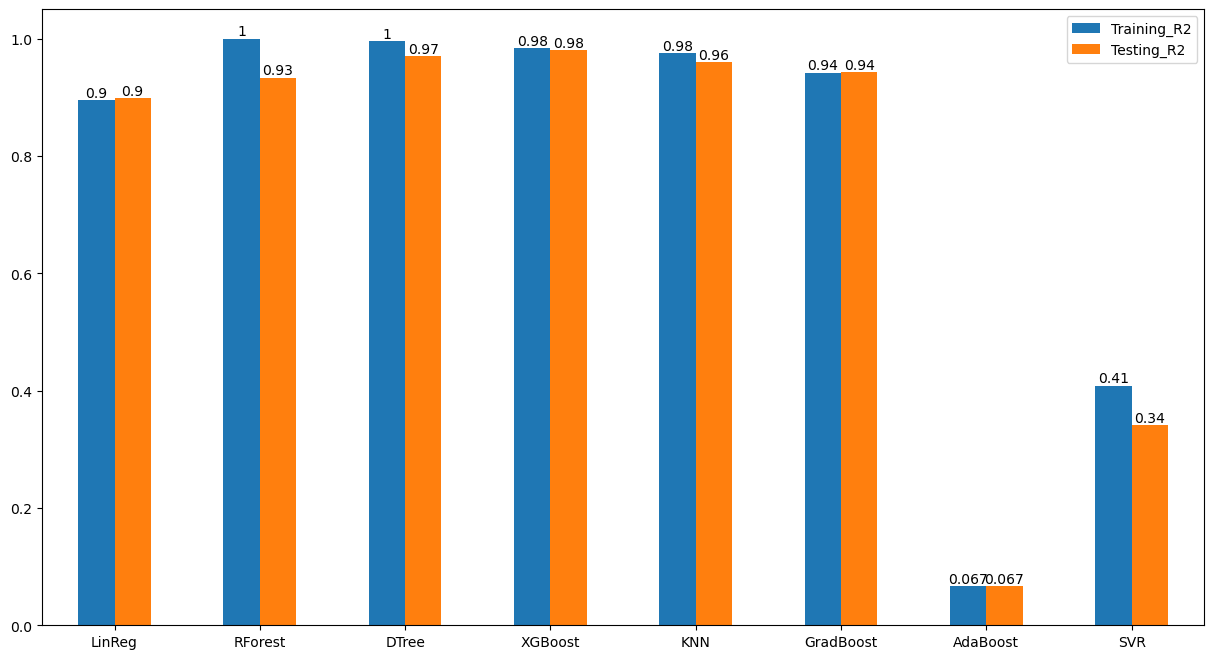

In [ ]:
# Visulisation of R2_Scores of train and test data by all models
ax = R2_df.plot(kind = 'bar', figsize = (15,8))
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0],fmt= '%.2g')
ax.bar_label(ax.containers[1],fmt= '%.2g')
plt.show()

In [ ]:
# import stacking regressor
from sklearn.ensemble import StackingRegressor

In [ ]:
# define the estimators for the regressor
estimators = [('lr',LinearRegression()),
              ('dt',DecisionTreeRegressor()),
              ('xgb',XGBRegressor()),
              ('knn',KNeighborsRegressor()),
              ('gbst',GradientBoostingRegressor()),
              ('adbst',AdaBoostRegressor()),
              ('svm',SVR()) ]

In [ ]:
regressor = StackingRegressor(estimators = estimators,final_estimator=RandomForestRegressor(),cv=10,n_jobs= -1)

In [ ]:
regressor.fit(X_train,y_train) # fitting the train data to the stacking regressor

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=Non...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('knn', KNeighborsRegressor()),
                              ('gbst', GradientBoostingRegressor()),
                              ('adbst', AdaBoostRegressor()), ('svm', SVR())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [ ]:
# predicting using stacking regressor

stacking_train_pred = regressor.predict(X_train)
stacking_test_pred = regressor.predict(X_test)

print("Stacking_R2_Score")
print(f'Training : {r2_score(y_train, stacking_train_pred)}')
print()
print(f'Testing : {r2_score(y_test, stacking_test_pred)}')
print()
print("Stacking_MAE")
print(f'Training : {mean_absolute_error(y_train, stacking_train_pred)}')
print()
print(f'Testing : {mean_absolute_error(y_test, stacking_test_pred)}')
print()
print("Stacking_MSE")
print(f'Training : {mean_squared_error(y_train, stacking_train_pred)}')
print()
print(f'Testing : {mean_squared_error(y_test, stacking_test_pred)}')
print()
print("Stacking_RMSE")
print(f'Training : {np.sqrt(mean_squared_error(y_train, stacking_train_pred))}')
print()
print(f'Testing : {np.sqrt(mean_squared_error(y_test, stacking_test_pred))}')
print()

Stacking_R2_Score
Training : 0.9904497189025

Testing : 0.9839627549676586

Stacking_MAE
Training : 247.98693677980154

Testing : 321.0896804216567

Stacking_MSE
Training : 151277.15222522517

Testing : 250823.86955205322

Stacking_RMSE
Training : 388.9436363089454

Testing : 500.82319190713724

